<a href="https://colab.research.google.com/github/Akhy999/Machine-Learning-for-Financial-Analysis/blob/main/Stock%20Price%20Data%20Analysis%20and%20CAPM%20Model/Portfolio_Assets_Allocation_and_Statistical_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT OVERVIEW

In this project, we will perform portfolio analysis by calculating portfolio returns, risk and sharp ratio. A portfolio is a collection of financial investments like stocks, bonds, cash, mutual funds and Exchange Traded Funds. Portfolio analysis is all about allocating an amount (investment) into a selected set of securities in order to maximize the profit and reduce the risk (Optimization).

# IMPORTING LIBRARIES & DATASETS AND PERFORMING DATA VISUALIZATION

In [2]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# Read the stock data file
stocks_df = pd.read_csv('/content/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [4]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


**MINI CHALLENGE #1:**
- **Use Plotly express to visualize raw stock data and normalized ones**

In [5]:
# function to normalize the stoct values w.r.t initial value
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

# Plot an interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for col in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[col], name = col)
  fig.show()


In [6]:
#plotting stock prices
interactive_plot(stocks_df, 'Stock Prices')

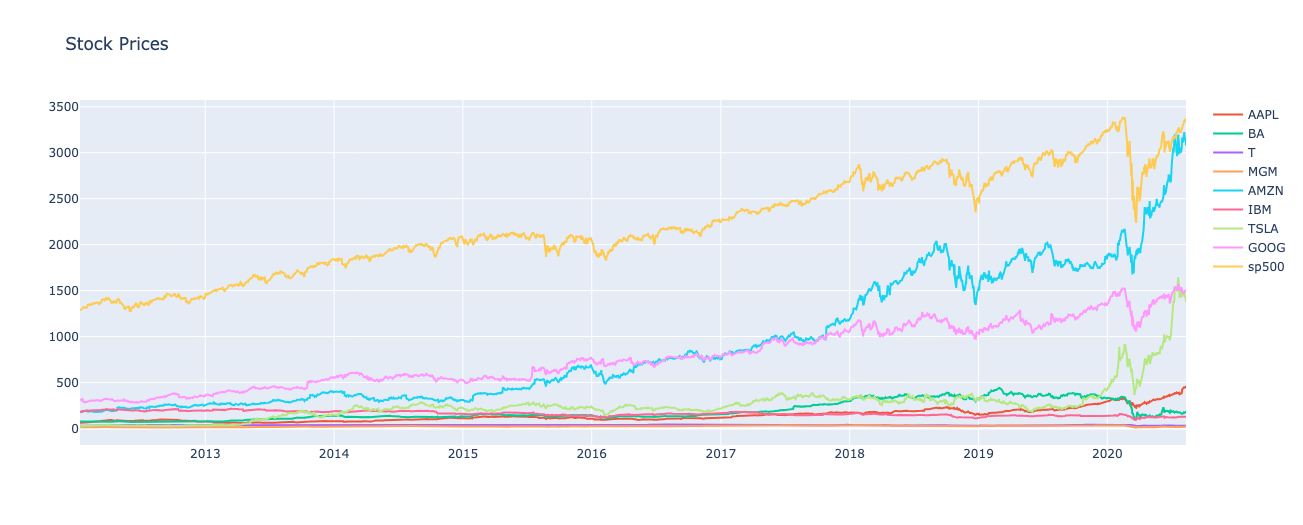

In [7]:
#plotting normalized stock prices
df_normalized = normalize(stocks_df)
interactive_plot(df_normalized, 'Normalized Stock Prices')

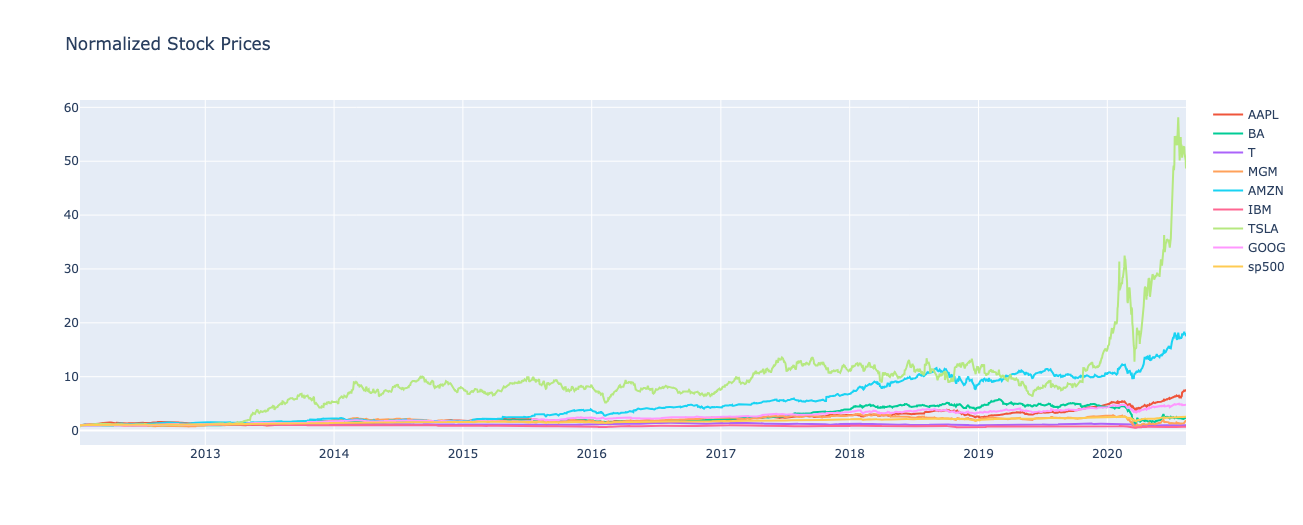

# PERFORMING RANDOM ASSET ALLOCATION AND CALCULATING THE PORTFOLIO DAILY RETURNS (For 1M)

In [8]:
np.random.seed(1)

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(9))

# Ensure that the sum of all weights are = 1
weights = weights / np.sum(weights)
print(weights)

[1.59933188e-01 2.76253510e-01 4.38641822e-05 1.15948347e-01
 5.62827314e-02 3.54130134e-02 7.14331357e-02 1.32526889e-01
 1.52165321e-01]


In [9]:
# Normalize the stock avalues
df_portfolio = normalize(stocks_df)
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


In [10]:
df_portfolio.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [11]:
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.599332e+05,276253.510467,43.864182,115948.347277,5.628273e+04,35413.013425,7.143314e+04,132526.888637,152165.320759
1,2012-01-13,1.593335e+05,272924.258806,43.791365,118051.285150,5.707932e+04,35140.379515,5.762695e+04,131548.155905,151412.418498
2,2012-01-17,1.611895e+05,275265.700231,44.053502,117095.404299,5.811585e+04,35305.136032,6.726093e+04,132303.781865,151950.379932
3,2012-01-18,1.628632e+05,274607.169831,44.170007,121683.632386,6.060479e+04,35515.006825,6.779194e+04,133215.164463,153638.233964
4,2012-01-19,1.623470e+05,276436.420944,44.301075,122352.748982,6.220757e+04,35407.129432,6.766551e+04,134616.964493,154397.000492
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.169639e+06,637603.764437,43.470976,159823.268799,1.025339e+06,24605.717829,3.755031e+06,622657.249588,390869.311081
2155,2020-08-06,1.210447e+06,629994.072489,43.456413,176455.595613,1.031727e+06,24737.132568,3.766562e+06,633850.295988,393381.699948
2156,2020-08-07,1.180797e+06,622018.563244,43.718549,181904.135584,1.013320e+06,24509.609796,3.673332e+06,631479.859788,393630.722166
2157,2020-08-10,1.197960e+06,656371.899154,43.980687,206948.204332,1.007145e+06,24931.310424,3.587005e+06,632160.141182,394710.143603


In [12]:
# Creating an additional column that stores the sum of all values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio.columns.difference(["Date"])].sum(axis = 1)
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $
0,2012-01-12,1.599332e+05,276253.510467,43.864182,115948.347277,5.628273e+04,35413.013425,7.143314e+04,132526.888637,152165.320759,1.000000e+06
1,2012-01-13,1.593335e+05,272924.258806,43.791365,118051.285150,5.707932e+04,35140.379515,5.762695e+04,131548.155905,151412.418498,9.831601e+05
2,2012-01-17,1.611895e+05,275265.700231,44.053502,117095.404299,5.811585e+04,35305.136032,6.726093e+04,132303.781865,151950.379932,9.985307e+05
3,2012-01-18,1.628632e+05,274607.169831,44.170007,121683.632386,6.060479e+04,35515.006825,6.779194e+04,133215.164463,153638.233964,1.009963e+06
4,2012-01-19,1.623470e+05,276436.420944,44.301075,122352.748982,6.220757e+04,35407.129432,6.766551e+04,134616.964493,154397.000492,1.015475e+06
...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.169639e+06,637603.764437,43.470976,159823.268799,1.025339e+06,24605.717829,3.755031e+06,622657.249588,390869.311081,7.785612e+06
2155,2020-08-06,1.210447e+06,629994.072489,43.456413,176455.595613,1.031727e+06,24737.132568,3.766562e+06,633850.295988,393381.699948,7.867198e+06
2156,2020-08-07,1.180797e+06,622018.563244,43.718549,181904.135584,1.013320e+06,24509.609796,3.673332e+06,631479.859788,393630.722166,7.721035e+06
2157,2020-08-10,1.197960e+06,656371.899154,43.980687,206948.204332,1.007145e+06,24931.310424,3.587005e+06,632160.141182,394710.143603,7.707276e+06


In [13]:
# Calculating the portfolio daily return
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  # Calculate the percentage of change from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.599332e+05,276253.510467,43.864182,115948.347277,5.628273e+04,35413.013425,7.143314e+04,132526.888637,152165.320759,1.000000e+06,0.000000
1,2012-01-13,1.593335e+05,272924.258806,43.791365,118051.285150,5.707932e+04,35140.379515,5.762695e+04,131548.155905,151412.418498,9.831601e+05,-1.683992
2,2012-01-17,1.611895e+05,275265.700231,44.053502,117095.404299,5.811585e+04,35305.136032,6.726093e+04,132303.781865,151950.379932,9.985307e+05,1.563389
3,2012-01-18,1.628632e+05,274607.169831,44.170007,121683.632386,6.060479e+04,35515.006825,6.779194e+04,133215.164463,153638.233964,1.009963e+06,1.144945
4,2012-01-19,1.623470e+05,276436.420944,44.301075,122352.748982,6.220757e+04,35407.129432,6.766551e+04,134616.964493,154397.000492,1.015475e+06,0.545699
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.169639e+06,637603.764437,43.470976,159823.268799,1.025339e+06,24605.717829,3.755031e+06,622657.249588,390869.311081,7.785612e+06,0.778750
2155,2020-08-06,1.210447e+06,629994.072489,43.456413,176455.595613,1.031727e+06,24737.132568,3.766562e+06,633850.295988,393381.699948,7.867198e+06,1.047911
2156,2020-08-07,1.180797e+06,622018.563244,43.718549,181904.135584,1.013320e+06,24509.609796,3.673332e+06,631479.859788,393630.722166,7.721035e+06,-1.857875
2157,2020-08-10,1.197960e+06,656371.899154,43.980687,206948.204332,1.007145e+06,24931.310424,3.587005e+06,632160.141182,394710.143603,7.707276e+06,-0.178206


# PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [14]:
# Assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# The portfolio_allocation function takes in the stock prices along with the weights and returns:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio
# (3) Daily return

def portfolio_allocation(df, weights):

  df_portfolio = df.copy()

  # Normalize the stock avalues
  df_portfolio = normalize(df_portfolio)

  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio.columns.difference(["Date"])].sum(axis = 1)

  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):

    # Calculating the percentage of change from the previous day
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100

  # set the value of first row to zero, as previous value is not available
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio

In [15]:
portfolio_allocation(stocks_df, weights)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.599332e+05,276253.510467,43.864182,115948.347277,5.628273e+04,35413.013425,7.143314e+04,132526.888637,152165.320759,1.000000e+06,0.000000
1,2012-01-13,1.593335e+05,272924.258806,43.791365,118051.285150,5.707932e+04,35140.379515,5.762695e+04,131548.155905,151412.418498,9.831601e+05,-1.683992
2,2012-01-17,1.611895e+05,275265.700231,44.053502,117095.404299,5.811585e+04,35305.136032,6.726093e+04,132303.781865,151950.379932,9.985307e+05,1.563389
3,2012-01-18,1.628632e+05,274607.169831,44.170007,121683.632386,6.060479e+04,35515.006825,6.779194e+04,133215.164463,153638.233964,1.009963e+06,1.144945
4,2012-01-19,1.623470e+05,276436.420944,44.301075,122352.748982,6.220757e+04,35407.129432,6.766551e+04,134616.964493,154397.000492,1.015475e+06,0.545699
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.169639e+06,637603.764437,43.470976,159823.268799,1.025339e+06,24605.717829,3.755031e+06,622657.249588,390869.311081,7.785612e+06,0.778750
2155,2020-08-06,1.210447e+06,629994.072489,43.456413,176455.595613,1.031727e+06,24737.132568,3.766562e+06,633850.295988,393381.699948,7.867198e+06,1.047911
2156,2020-08-07,1.180797e+06,622018.563244,43.718549,181904.135584,1.013320e+06,24509.609796,3.673332e+06,631479.859788,393630.722166,7.721035e+06,-1.857875
2157,2020-08-10,1.197960e+06,656371.899154,43.980687,206948.204332,1.007145e+06,24931.310424,3.587005e+06,632160.141182,394710.143603,7.707276e+06,-0.178206


# PORTFOLIO DATA VISUALIZATION

In [16]:
# Plot the portfolio daily return
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show()

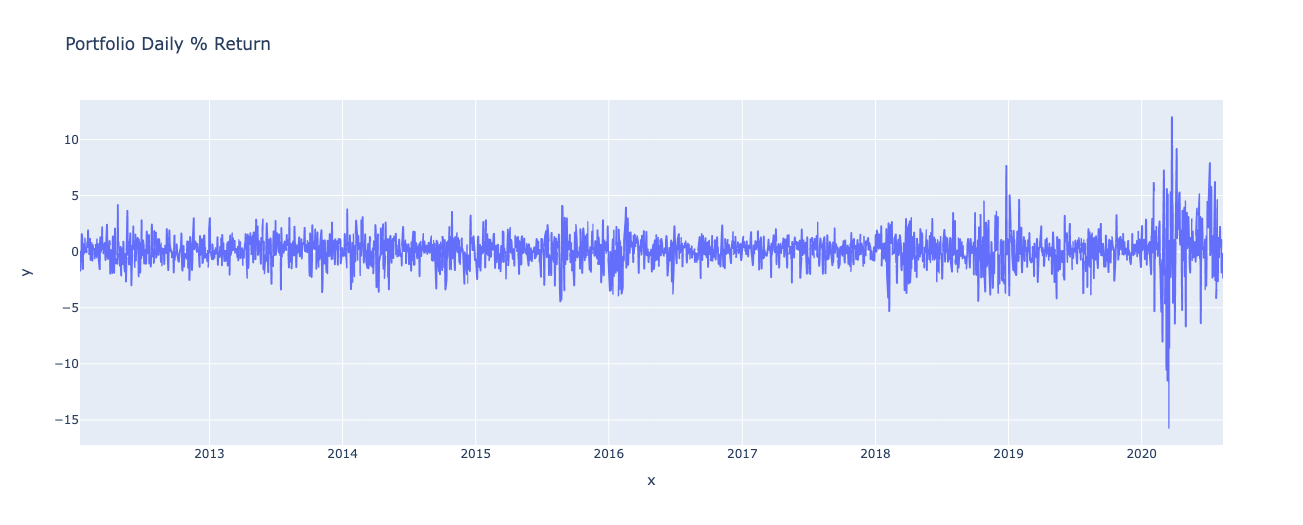

In [17]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in $ over time')

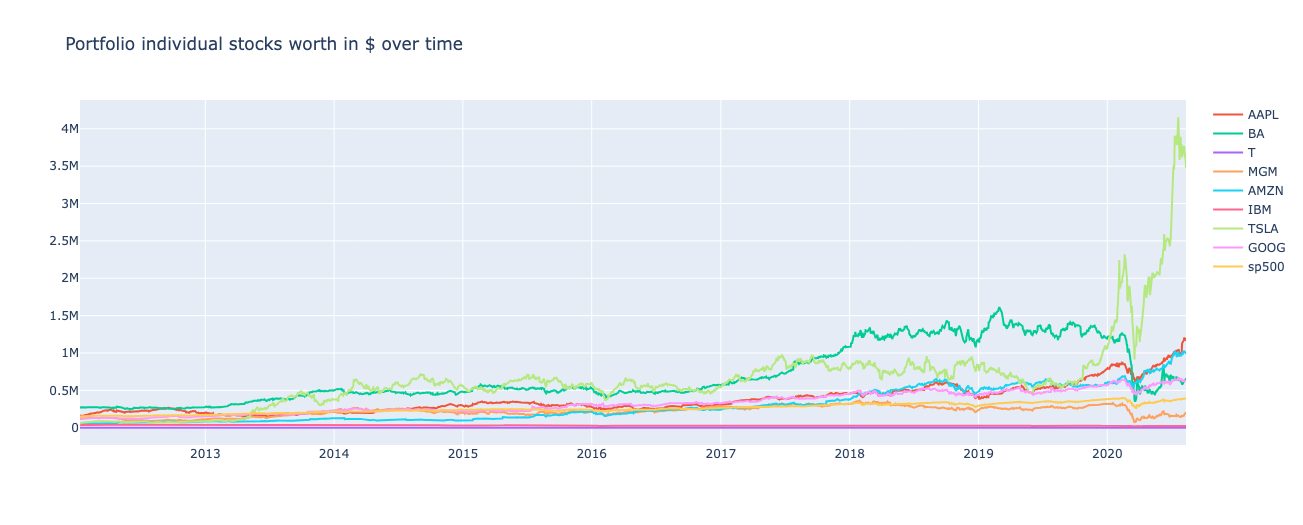

In [18]:
# Histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

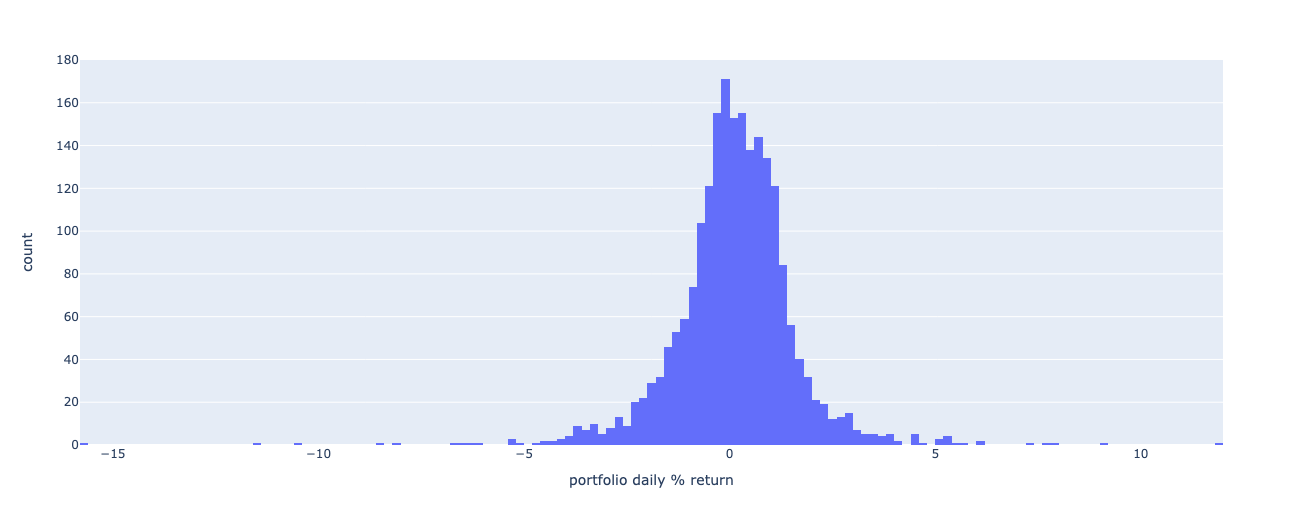

In [19]:
# Overall portfolio daily worth vs time
interactive_plot(df_portfolio[["Date", "portfolio daily worth in $"]], 'Portfolio Overall Value in $')

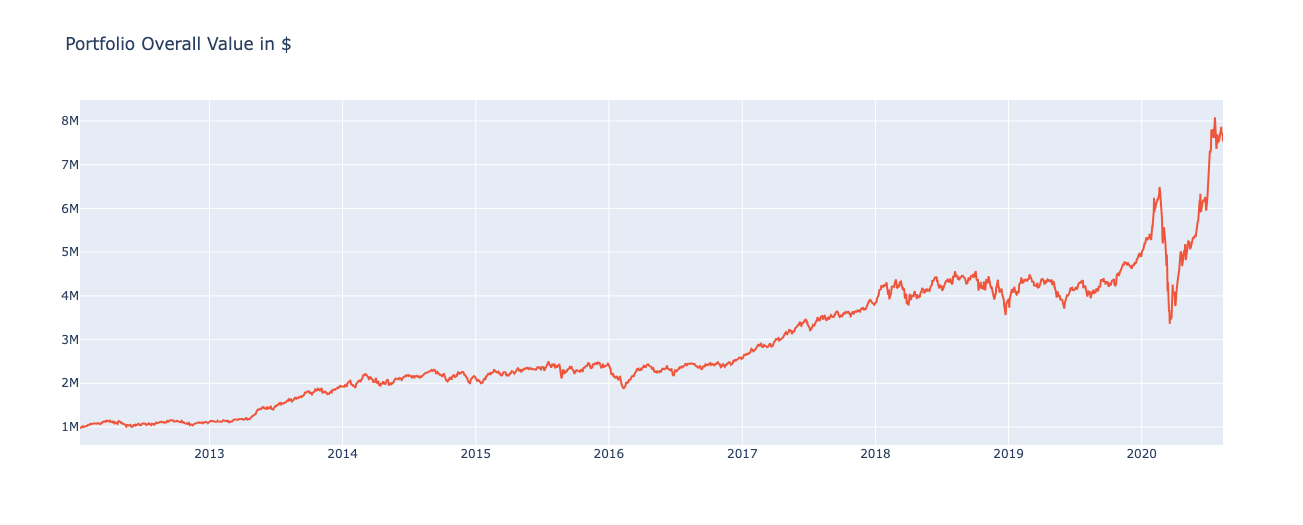

# CALCULATING PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [20]:
df_portfolio

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.599332e+05,276253.510467,43.864182,115948.347277,5.628273e+04,35413.013425,7.143314e+04,132526.888637,152165.320759,1.000000e+06,0.000000
1,2012-01-13,1.593335e+05,272924.258806,43.791365,118051.285150,5.707932e+04,35140.379515,5.762695e+04,131548.155905,151412.418498,9.831601e+05,-1.683992
2,2012-01-17,1.611895e+05,275265.700231,44.053502,117095.404299,5.811585e+04,35305.136032,6.726093e+04,132303.781865,151950.379932,9.985307e+05,1.563389
3,2012-01-18,1.628632e+05,274607.169831,44.170007,121683.632386,6.060479e+04,35515.006825,6.779194e+04,133215.164463,153638.233964,1.009963e+06,1.144945
4,2012-01-19,1.623470e+05,276436.420944,44.301075,122352.748982,6.220757e+04,35407.129432,6.766551e+04,134616.964493,154397.000492,1.015475e+06,0.545699
...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,1.169639e+06,637603.764437,43.470976,159823.268799,1.025339e+06,24605.717829,3.755031e+06,622657.249588,390869.311081,7.785612e+06,0.778750
2155,2020-08-06,1.210447e+06,629994.072489,43.456413,176455.595613,1.031727e+06,24737.132568,3.766562e+06,633850.295988,393381.699948,7.867198e+06,1.047911
2156,2020-08-07,1.180797e+06,622018.563244,43.718549,181904.135584,1.013320e+06,24509.609796,3.673332e+06,631479.859788,393630.722166,7.721035e+06,-1.857875
2157,2020-08-10,1.197960e+06,656371.899154,43.980687,206948.204332,1.007145e+06,24931.310424,3.587005e+06,632160.141182,394710.143603,7.707276e+06,-0.178206


In [21]:
# Cummulative return of the portfolio (last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))


Cummulative return of the portfolio is 652.9660637341096 %


In [22]:
# Calculating the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.5298084896915185


In [23]:
# Calculating the average daily return
print('Average daily return of the portfolio is {} %'.format(df_portfolio['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.1053371541339428 %


In [24]:
# Portfolio sharpe ratio
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.0930619702988715
